In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11, 4)})

In [5]:
opsd_daily = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
## Para ahorrarse eso read_csv(... index_col=0, parse_dates=True)
print(opsd_daily.shape)
opsd_daily.tail()

(4383, 5)


,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [7]:
print("antes de convertir los tipos")
print(opsd_daily.dtypes)
opsd_daily["Date"] = pd.to_datetime(opsd_daily["Date"])
print("luego de convertir los tipos")
print(opsd_daily.dtypes)

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

In [11]:
# opsd_daily.tail()
opsd_daily.set_index("Date", inplace=True)
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [21]:
opsd_daily["weekday"] = opsd_daily.index.day_name()

In [23]:
opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,weekday
Date,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,Friday
2009-06-02,1201.522,NaN,NaN,NaN,Tuesday


In [25]:
opsd_daily.loc['2017-08-10':'2017-08-15']


,Consumption,Wind,Solar,Wind+Solar,weekday
Date,,,,,
2017-08-10,1351.491,100.274,71.160,171.434,Thursday
2017-08-11,1329.039,108.577,42.198,150.775,Friday
2017-08-12,1121.458,305.908,80.906,386.814,Saturday
2017-08-13,1025.070,101.266,141.157,242.423,Sunday
2017-08-14,1305.341,136.416,201.027,337.443,Monday
2017-08-15,1333.398,182.064,172.205,354.269,Tuesday


In [26]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,weekday
Date,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,Friday
2012-02-04,1372.614,20.551,45.225,65.776,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,Sunday
2012-02-06,1574.766,34.896,55.389,90.285,Monday
2012-02-07,1615.078,100.312,19.867,120.179,Tuesday
2012-02-08,1613.774,93.763,36.930,130.693,Wednesday
2012-02-09,1591.532,132.219,19.042,151.261,Thursday


<AxesSubplot:xlabel='Date'>

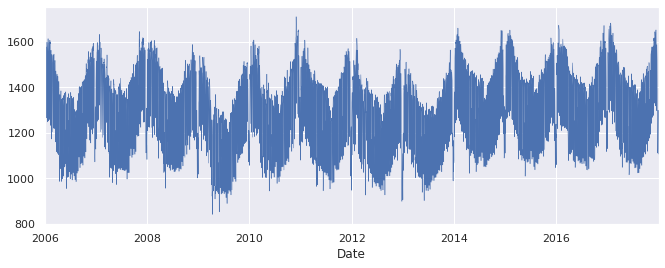

In [29]:
opsd_daily["Consumption"].plot(linewidth=0.5)

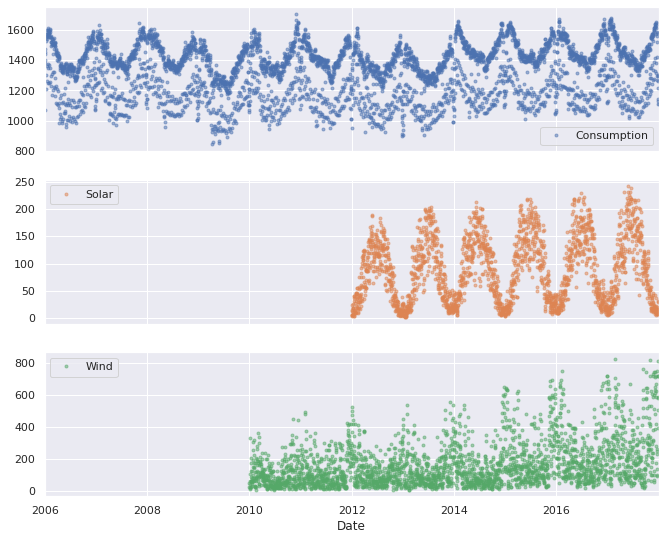

In [33]:
cols_to_plot = ["Consumption", "Solar", "Wind"]
axes = opsd_daily[cols_to_plot].plot(
    marker = ".",
    alpha= 0.5,
    linestyle = 'None',
    subplots = True, # Lo mas importante, nos genera 3 plots
    figsize =(11,9)
)

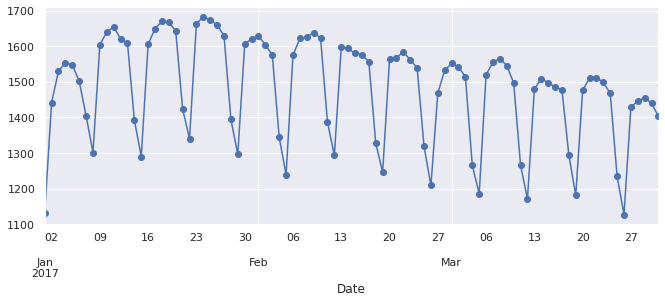

In [39]:
ax = opsd_daily.loc['2017-01':"2017-03", 'Consumption'].\
    plot(
    marker='o',
    linestyle='-'
)


In [68]:
import matplotlib.dates as mdates

In [41]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month

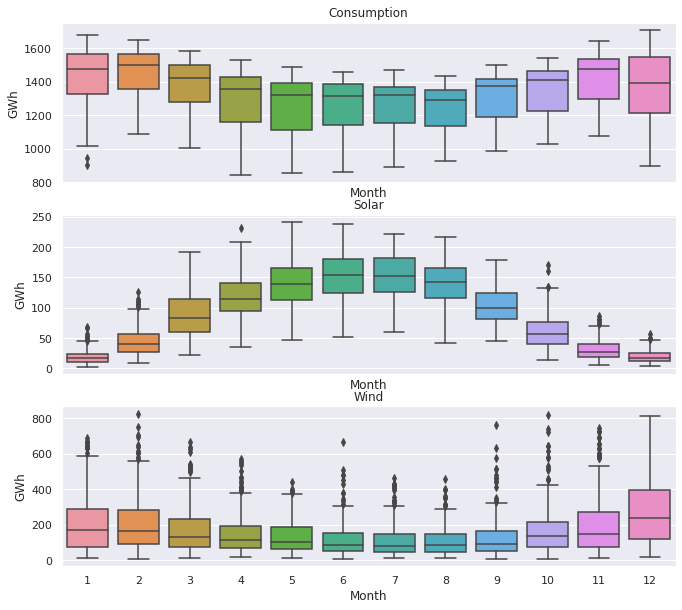

In [42]:
fig, axes = plt.subplots(3, 1, figsize=(11,10), sharex=True)

for name, ax, in zip(cols_to_plot, axes):
    sns.boxplot(data=opsd_daily, x="Month", y=name, ax=ax)
    ax.set_ylabel("GWh")
    ax.set_title(name)

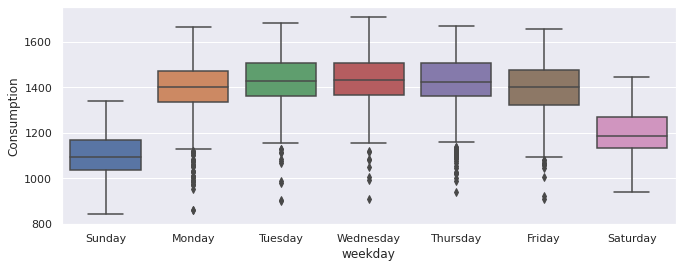

In [44]:
sns.boxplot(data=opsd_daily, x='weekday', y='Consumption');


In [45]:
# Rango frecuencia diaria
pd.date_range("1991","2001-09", freq="D")

DatetimeIndex(['1991-01-01', '1991-01-02', '1991-01-03', '1991-01-04',
               '1991-01-05', '1991-01-06', '1991-01-07', '1991-01-08',
               '1991-01-09', '1991-01-10',
               ...
               '2001-08-23', '2001-08-24', '2001-08-25', '2001-08-26',
               '2001-08-27', '2001-08-28', '2001-08-29', '2001-08-30',
               '2001-08-31', '2001-09-01'],
              dtype='datetime64[ns]', length=3897, freq='D')

In [47]:
# Frecuencia horaria
pd.date_range("2004-09-20", periods=8, freq="H")

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [48]:
opsd_daily.index


DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [51]:
rango_sample = pd.to_datetime(["2013-02-03", "2013-02-06", "2013-02-09"])
consumption_sample = opsd_daily.loc[rango_sample, ["Consumption"]].copy()
consumption_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-09,1227.672


In [52]:
consumption_sample.asfreq('D')

,Consumption
2013-02-03,1109.639
2013-02-04,NaN
2013-02-05,NaN
2013-02-06,1451.449
2013-02-07,NaN
2013-02-08,NaN
2013-02-09,1227.672


In [54]:
cs_freq = consumption_sample.asfreq('D')
cs_freq["Consumption_Filled"] = consumption_sample.asfreq('D', method="ffill")
cs_freq


,Consumption,Consumption_Filled
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,NaN,1451.449
2013-02-09,1227.672,1227.672


# Re sampling y Rolling Windows

## Weekly average

In [57]:
opsd_weekly_mean = opsd_daily[cols_to_plot].resample('W').mean()
print(opsd_daily.shape[0]/opsd_weekly_mean.shape[0])
opsd_weekly_mean


6.990430622009569


,Consumption,Solar,Wind
Date,,,
2006-01-01,1069.184000,NaN,NaN
2006-01-08,1381.300143,NaN,NaN
2006-01-15,1486.730286,NaN,NaN
2006-01-22,1490.031143,NaN,NaN
2006-01-29,1514.176857,NaN,NaN
...,...,...,...
2017-12-03,1536.236314,18.320857,284.334286
2017-12-10,1554.824946,16.440286,636.514714
2017-12-17,1543.856889,18.143714,442.531857


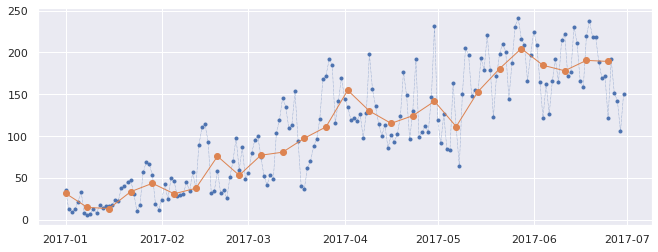

In [61]:
start, end = '2017-01', '2017-06'

fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, "Solar"],
        marker='.', linestyle=':', linewidth=0.5, label="Daily")
ax.plot(opsd_weekly_mean.loc[start:end, "Solar"],
        marker='o', linestyle='-', linewidth=1, label='Weekly Resample')
ax.set_ylabel="Solar GWh"


## Rolling window

In [62]:
opsd_7d = opsd_daily[cols_to_plot].rolling(7, center=True).mean()

In [65]:
# Rolling time tiene la misma cantidad de filas.
print(opsd_daily.shape[0]/opsd_7d.shape[0])

1.0


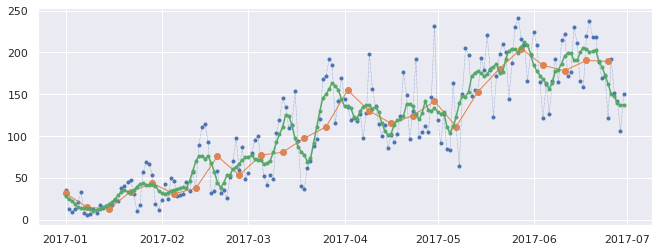

In [66]:
start, end = '2017-01', '2017-06'

fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, "Solar"],
        marker='.', linestyle=':', linewidth=0.5, label="Daily")
ax.plot(opsd_weekly_mean.loc[start:end, "Solar"],
        marker='o', linestyle='-', linewidth=1, label='Weekly Resample')
ax.plot(opsd_7d.loc[start:end, "Solar"],
        marker='.', linestyle='-', label='Rolling window 7d')
ax.set_ylabel="Solar GWh"

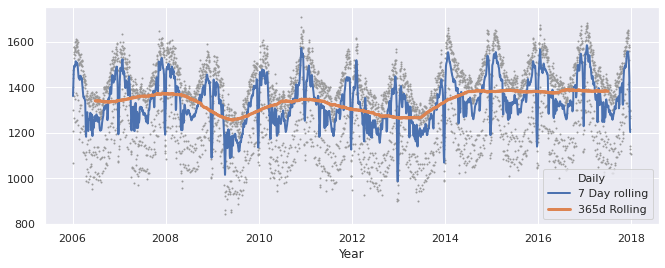

In [71]:
opsd_365d = opsd_daily[cols_to_plot].rolling(window=365, center=True, min_periods=360).mean()


fig, ax = plt.subplots()
ax.plot(opsd_daily["Consumption"], marker='.', markersize=2, color='0.6', linestyle='None', label='Daily')
ax.plot(opsd_7d["Consumption"], linewidth=2, label='7 Day rolling')
ax.plot(opsd_365d["Consumption"], linewidth=3, label='365d Rolling')

#ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_xlabel('Year')
ax.legend()